# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages
from google.colab import files
files.upload()

Saving 5_a.csv to 5_a.csv
Saving 5_b.csv to 5_b.csv
Saving 5_c.csv to 5_c.csv
Saving 5_d.csv to 5_d.csv


{'5_a.csv': b'y,proba\r\n1.0,0.6373866237658206\r\n1.0,0.6351650448158641\r\n1.0,0.7665855865120033\r\n1.0,0.7245642294966452\r\n1.0,0.8891988000338785\r\n1.0,0.6016002164626768\r\n1.0,0.6663225797608214\r\n1.0,0.5670120690928357\r\n1.0,0.6502302984736439\r\n1.0,0.829345546224893\r\n1.0,0.587651767794799\r\n1.0,0.8385220454950837\r\n1.0,0.8258256222086358\r\n1.0,0.6754981115497111\r\n1.0,0.6674238909165087\r\n1.0,0.5830382526004361\r\n1.0,0.6941178982737743\r\n1.0,0.6982278634850806\r\n1.0,0.5143759250001354\r\n1.0,0.511865539049447\r\n1.0,0.5693376919131107\r\n1.0,0.5664806516380112\r\n1.0,0.6371473961924938\r\n1.0,0.755482568935378\r\n1.0,0.6929698517176817\r\n1.0,0.7661689825735853\r\n1.0,0.5632779482742258\r\n1.0,0.8372099556958508\r\n1.0,0.5809158030642513\r\n1.0,0.5567773954653294\r\n1.0,0.804078656735244\r\n1.0,0.5840368820951208\r\n1.0,0.668584594357464\r\n1.0,0.7670676858626078\r\n1.0,0.6091170153472177\r\n1.0,0.5092846997811341\r\n1.0,0.8700085019170322\r\n1.0,0.8532220412575

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

[[    0.     0.]
 [  100. 10000.]]
Accuracy score is: 0.9900990099009901
F1 score is: 0.9950248756218906


100%|██████████| 10100/10100 [01:35<00:00, 106.15it/s]


AUC Score is: 0.48829900000000004


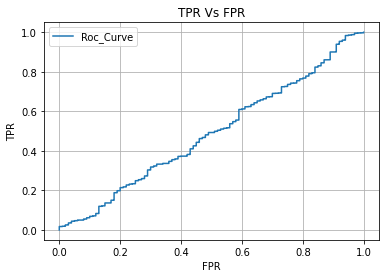

In [19]:
from tqdm import tqdm
import matplotlib.pyplot as plt
# calculation of TP,FP,TN,FN and accuracy count
def calc_TP_FP_TN_FN(y_predict,y_actual):
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  count = 0
  for j in range(len(y_predict)):
    if y_predict[j] == y_actual[j]:
      count+=1
      if y_predict[j] == 0:
        TN+=1
      else:
        TP+=1
    else:
      if y_predict[j] == 0:
        FN+=1
      else:
        FP+=1
  return TP,TN,FP,FN,count
# Reading CSV file
df = pd.read_csv("5_a.csv")
# Accesing columns in CSV file
y_score = df["y"]
y_proba = df["proba"]
#Calculation of confusion matrix and display
y_predict = np.zeros(y_proba.shape)
for i in range(len(y_predict)):
  if y_proba[i] < 0.5:
    y_predict[i] = 0
  else:
    y_predict[i] = 1
TP,TN,FP,FN,acc_count = calc_TP_FP_TN_FN(y_predict,y_score)
confuse_matrix = np.zeros((2,2))
confuse_matrix[0][0] = TN
confuse_matrix[0][1] = FN
confuse_matrix[1][0] = FP
confuse_matrix[1][1] = TP
print(confuse_matrix)
#Calculation of accuracy score
acc_score = acc_count/len(y_predict)
print("Accuracy score is: "+str(acc_score))
#Calculation of F1 score
precision = TP/(TP+FP)
recall = TP/(FN+TP)
F1_score = 2*precision*recall/(precision+recall)
print("F1 score is: "+str(F1_score))
#Calculation of AUC Value
sort_df = df.sort_values(by=["proba"], ascending=False)
y_score = sort_df["y"]
y_proba = sort_df["proba"]
desc_y_proba = np.array(y_proba)
y_score = np.array(y_score)
TPR_lst = []
FPR_lst = []
for k in tqdm(range(len(desc_y_proba))):
  temp_array = np.zeros(desc_y_proba.shape)
  #Based on the threshold value of Y_proba, manipulating the values(0 or 1) in sorted array
  temp_array[:k+1] = 1
  temp_array[k+1:] = 0
  TP,TN,FP,FN,acc_count = calc_TP_FP_TN_FN(temp_array,y_score)
  TPR = TP/(FN+TP)
  FPR = FP/(TN+FP)
  TPR_lst.append(TPR)
  FPR_lst.append(FPR)
AUC_val = np.trapz(TPR_lst,FPR_lst)
print("AUC Score is: "+str(AUC_val))
# Plotting ROC Curve
plt.plot(FPR_lst,TPR_lst,label="Roc_Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("TPR Vs FPR")
plt.grid()
plt.show()



<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

[[9761.   45.]
 [ 239.   55.]]
Accuracy score is: 0.9718811881188119
F1 score is: 0.2791878172588833


100%|██████████| 10100/10100 [01:33<00:00, 107.74it/s]


AUC Score is: 0.9377570000000001


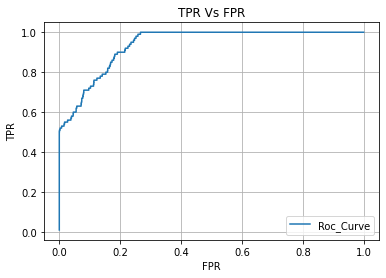

In [20]:
from tqdm import tqdm
import matplotlib.pyplot as plt
# calculation of TP,FP,TN,FN and accuracy count
def calc_TP_FP_TN_FN(y_predict,y_actual):
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  count = 0
  for j in range(len(y_predict)):
    if y_predict[j] == y_actual[j]:
      count+=1
      if y_predict[j] == 0:
        TN+=1
      else:
        TP+=1
    else:
      if y_predict[j] == 0:
        FN+=1
      else:
        FP+=1
  return TP,TN,FP,FN,count
# Reading CSV file
df = pd.read_csv("5_b.csv")
# Accesing columns in CSV file
y_score = df["y"]
y_proba = df["proba"]
#Calculation of confusion matrix and display
y_predict = np.zeros(y_proba.shape)
for i in range(len(y_predict)):
  if y_proba[i] < 0.5:
    y_predict[i] = 0
  else:
    y_predict[i] = 1
TP,TN,FP,FN,acc_count = calc_TP_FP_TN_FN(y_predict,y_score)
confuse_matrix = np.zeros((2,2))
confuse_matrix[0][0] = TN
confuse_matrix[0][1] = FN
confuse_matrix[1][0] = FP
confuse_matrix[1][1] = TP
print(confuse_matrix)
#Calculation of accuracy score
acc_score = acc_count/len(y_predict)
print("Accuracy score is: "+str(acc_score))
#Calculation of F1 score
precision = TP/(TP+FP)
recall = TP/(FN+TP)
F1_score = 2*precision*recall/(precision+recall)
print("F1 score is: "+str(F1_score))
#Calculation of AUC Value
sort_df = df.sort_values(by=["proba"], ascending=False)
y_score = sort_df["y"]
y_proba = sort_df["proba"]
desc_y_proba = np.array(y_proba)
y_score = np.array(y_score)
TPR_lst = []
FPR_lst = []
for k in tqdm(range(len(desc_y_proba))):
  temp_array = np.zeros(desc_y_proba.shape)
  #Based on the threshold value of Y_proba, manipulating the values(0 or 1) in sorted array
  temp_array[:k+1] = 1
  temp_array[k+1:] = 0
  TP,TN,FP,FN,acc_count = calc_TP_FP_TN_FN(temp_array,y_score)
  TPR = TP/(FN+TP)
  FPR = FP/(TN+FP)
  TPR_lst.append(TPR)
  FPR_lst.append(FPR)
AUC_val = np.trapz(TPR_lst,FPR_lst)
print("AUC Score is: "+str(AUC_val))
# Plotting ROC Curve
plt.plot(FPR_lst,TPR_lst,label="Roc_Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("TPR Vs FPR")
plt.grid()
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [31]:
from tqdm import tqdm
# calculation of TP,FP,TN,FN and accuracy count
def calc_TP_FP_TN_FN(y_predict,y_actual):
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  count = 0
  for j in range(len(y_predict)):
    if y_predict[j] == y_actual[j]:
      count+=1
      if y_predict[j] == 0:
        TN+=1
      else:
        TP+=1
    else:
      if y_predict[j] == 0:
        FN+=1
      else:
        FP+=1
  return TP,TN,FP,FN,count
# Reading CSV file
df = pd.read_csv("5_c.csv")
# Accesing columns in CSV file
metrc_A_dict = {}
sort_df = df.sort_values(by=["prob"], ascending=False)
y_proba = np.array(sort_df["prob"])
y_score = np.array(sort_df["y"])
for i in tqdm(range(len(y_proba))):
  temp_array = np.zeros(y_proba.shape)
  # y_actual < y_threshold value resetting temp array to calculate TP,TN,FP,FN,acc_count
  temp_array[:i+1] = 1
  temp_array[i:] = 0
  TP,TN,FP,FN,acc_count = calc_TP_FP_TN_FN(temp_array,y_score)
  metrc_A = 500*FN+100*FP
  metrc_A_dict[y_proba[i]] = metrc_A
# calculation of least metric A value
least_metric_A = sorted(metrc_A_dict.items(),key=lambda x:x[1])[0][1]
print("Least Metric_A Value: "+str(least_metric_A))
Best_thersh_Proba = list(metrc_A_dict.keys())[list(metrc_A_dict.values()).index(least_metric_A)]
print("Best threshold probability value for least Metric A is: "+str(Best_thersh_Proba))

100%|██████████| 2852/2852 [00:08<00:00, 345.72it/s]

Least Metric_A Value: 141000
Best threshold probability value for least Metric A is: 0.22987164436159915


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
from tqdm import tqdm
# Reading CSV file
df = pd.read_csv("5_d.csv")
# Accesing columns in CSV file
y_score = np.array(df["y"])
y_pred = np.array(df["pred"])
sqrd_err_mtrx = np.zeros(y_pred.shape)
abs_pr_err_mtrx = np.zeros(y_pred.shape)
sqrd_tot_err_mtrx = np.zeros(y_pred.shape)
#Calculation of square error, Total error and mean absolute percentage error
for i in tqdm(range(len(y_pred))):
  sq_err = (y_score[i]-y_pred[i])**2
  sqrd_err_mtrx[i] = sq_err
  abs_pr_err = abs((y_score[i]-y_pred[i])/np.mean(y_pred))
  abs_pr_err_mtrx[i] = abs_pr_err
  sq_tot_err = (y_score[i]-np.mean(y_pred))**2
  sqrd_tot_err_mtrx[i] = sq_tot_err
print("Mean Square Error is: "+str(np.mean(sqrd_err_mtrx)))
print("MAPE is: "+str(np.mean(abs_pr_err_mtrx)))
SS_residual = np.mean(sqrd_err_mtrx)
SS_total = np.mean(sqrd_tot_err_mtrx)
Rsqr_err = 1-(SS_residual/SS_total)
print("R^2 error is: "+str(Rsqr_err))

  

100%|██████████| 157200/157200 [00:24<00:00, 6388.12it/s]

Mean Square Error is: 177.16569974554707
MAPE is: 0.12927250737711504
R^2 error is: 0.9563583447288622
